# R Client Terrabrasilis Analytics API

**terrabrasilisAnalyticsAPI** is an R client package for Terrabrasilis Analytics API. 

## Getting started

Installing and loading terrabrasilisAnalyticsAPI package in R


In [2]:
# devtools::install_github("terrabrasilis/terrabrasilisAnalyticsAPI") # github group name is terrabrasilis
options(warn=-1) 
options(scipen=999) # disable scientific notation
options(repr.plot.width = 14, repr.plot.height = 9, repr.plot.res = 200)
library(terrabrasilisAnalyticsAPI) # R package name is terrabrasilisAnalyticsAPI
library(dplyr)
library(ggplot2) 

Initialize Terrabrasilis Analytics API path variable

In [3]:
apiPath <- "https://terrabrasilis.dpi.inpe.br/dashboard/api/v1/redis-cli/"
apiPath

[1] "https://terrabrasilis.dpi.inpe.br/dashboard/api/v1/redis-cli/"

Define calls for application identifiers listing. From that information, it is possible then to make specific requests to other API end-points.


In [4]:
appIdentifier <- list_datasets(apiPath)
appIdentifier

[1] "prodes_cerrado"      "prodes_amazon"       "prodes_legal_amazon"
[4] "prodes_pampa"        "prodes_pantanal"

Create a prodesCerrado variable.

In [5]:
prodesCerrado <- appIdentifier[1]
prodesCerrado

[1] "prodes_cerrado"

The first question that reminds us to ask to the API is: which periods do Prodes Cerrado contains?

In [6]:
periods <- list_periods(apiPath, prodesCerrado)
periods

startDate.year,startDate.month,startDate.day,endDate.year,endDate.month,endDate.day
<int>,<int>,<int>,<int>,<int>,<int>
2000,8,1,2002,7,31
2002,8,1,2004,7,31
2004,8,1,2006,7,31
2006,8,1,2008,7,31
2008,8,1,2010,7,31
2010,8,1,2012,7,31
2012,8,1,2013,7,31
2013,8,1,2014,7,31
2014,8,1,2015,7,31


Users can also ask to the API, for example, which classes do PRODES Cerrado contains?

In [7]:
classes <- list_classes(apiPath, prodesCerrado)
classes

id,name,description
<int>,<chr>,<chr>
1,deforestation,It is the process of complete and permanent disappearance of forests


In this case, it is just one class designating deforestation label. Other thematic mapping projects, however, would contain more than one class or even the same class name.

Besides responding which classes and periods, users might ask which local of interests (lois) as states, municipalities, conservation units, and indigeneous areas the API provides. 

In [8]:
locals <- list_locals(apiPath, prodesCerrado)
locals

gid,name
<int>,<chr>
1,uf
2,mun
3,consunit
4,indi


Nevertheless, locals are not considered the final granularity since each state, municipality, conservation unit, and indigeneous areas also contain small-scale local of interests.


In [9]:
localOfInterest <- list_local_of_interests(apiPath, prodesCerrado)
localOfInterest[450:458,] # select lines from 450 to 458

gid,loiname,codibge,loi
<int>,<chr>,<int>,<dbl>
2276,SÃO SEBASTIÃO DO RIO PRETO_MINAS GERAIS,3164803,2
2152,CARNEIRINHO_MINAS GERAIS,3114550,2
2040,TRÊS LAGOAS_MATO GROSSO DO SUL,5008305,2
1833,RECURSOLÂNDIA_TOCANTINS,1718501,2
2631,MURICILÂNDIA_TOCANTINS,1713957,2
2385,LUPÉRCIO_SÃO PAULO,3527801,2
2025,NOVA ANDRADINA_MATO GROSSO DO SUL,5006200,2
1742,MAIRIPOTABA_GOIÁS,5212600,2
1682,SÃO JOSÉ DO RIO PRETO_SÃO PAULO,3549805,2


It is possible to filter loinames by one specific loi such as mun.

In [10]:
loiMUN = dplyr::filter(locals, grepl("mun", name))$gid
loinamesByLoiM <- list_localOfInterestByLocal(apiPath, prodesCerrado, loiMUN)
loinamesByLoiM

gid,loiname,codibge
<int>,<chr>,<int>
2850,CRIXÁS_GOIÁS,5206404
2468,ADELÂNDIA_GOIÁS,5200159
1798,DOIS IRMÃOS DO TOCANTINS_TOCANTINS,1707207
2429,SANTA LÚCIA_SÃO PAULO,3546900
1489,PONTO CHIQUE_MINAS GERAIS,3152131
2335,ASSIS_SÃO PAULO,3504008
1989,ROMARIA_MINAS GERAIS,3156403
1560,SERRA DO SALITRE_MINAS GERAIS,3166808
1587,CAMPOS NOVOS PAULISTA_SÃO PAULO,3509809


In order to fit data into governmental needs, we also considered filters for each data recognized that as type in the data API call.

In [11]:
filters <- list_filters(apiPath, prodesCerrado)
filters

id,type
<int>,<chr>
1,fid_area >= 0.0625
2,fid_area >= 0.01


All this data is used to gather specific thematic map area values produced by government agencies such as the National Institute for Space Research. In this example, users are able to acquire data by loiname, that is, the function accepts as parameters, the class name and loiname gid as well.

In [12]:
fillYears <- function(data1){
  for(i in 1:nrow(data1)){
    years_jump2 <- data1$startDate.year == data1$startDate.year[i]-1 & data1$endDate.year == data1$startDate.year[i]+1
    
    if (any(years_jump2)){
      
      data1$endDate.year[i] <- ifelse(is.na(data1$endDate.year[i]), data1$startDate.year[i]+1, data1$endDate.year[i])
      data1$loiname[i] <- ifelse(is.na(data1$loiname[i]) & any(years_jump2), data1$loiname[which(years_jump2)], data1$loiname[i])
      data1$area[i] <- ifelse(is.na(data1$area[i]) & any(years_jump2), data1$area[which(years_jump2)]/2, data1$area[i])
      
      idx <- which(years_jump2)
      data1$endDate.year[idx] <- ifelse(which(years_jump2) != 0, data1$endDate.year[idx]-1, data1$endDate.year[idx])
      data1$area[idx] <-ifelse(which(years_jump2) != 0, data1$area[idx]/2, data1$area[idx])  
    } else {
      data1[i,]
    }
  }
  return(data1)
}

fillGapYears <- function(data1){
  for(i in 1:nrow(data1)){
    
    if (any(is.na(data1[i,]))){
      
      data1$endDate.year[i] <- ifelse(is.na(data1$endDate.year[i]), data1$startDate.year[i]+1, data1$endDate.year[i])
      data1$loiname[i] <- unique(na.omit(data1$loiname, ))
      data1$area[i] <- 0.0
      
    } else {
      data1[i,]
    }
  }
  return(data1)
}

get_dataByMultipleLocalOfInterest_year <- function(apiPath, appIdentifier, class, loiname){
  
  allM <- NULL
  
  for (i in loiname$gid) {
    cat(i, "\n")
    data <- get_dataByLocalOfInterest(apiPath = apiPath, appIdentifier = prodesCerrado, class = classes$name, loiname = i) # loinamesByLoiM$gid[i] )
    data <- data[data$type == 2 & data$endDate.year > 2000,]
    
    if(any(data$endDate.year %in% c(2002, 2004, 2006, 2008, 2010, 2012)) == TRUE){
      years <- data$startDate.year[which(data$endDate.year <= 2012)]
      data1 <- tidyr::complete(data, name, clazz, startDate.year = years+1, startDate.month, startDate.day, endDate.month, endDate.day, loi, type)
      data1 <- fillYears(data1) %>% 
        dplyr::arrange(startDate.year)
      
      complete_period <- seq(2000, 2019, by=1)
      gap_years <- complete_period[ ! complete_period  %in%  data1$startDate.year]
      
      if(!identical(gap_years, numeric(0)) & length(gap_years) >= 0){
        data2 <- tidyr::complete(data1, name, clazz, startDate.year = gap_years, startDate.month, startDate.day, endDate.month, endDate.day, loi, type)
        data2 <- fillGapYears(data2) %>% 
          dplyr::arrange(startDate.year)
        allM <- plyr::rbind.fill(allM, data2)  
      } else {
        data2 <- data1
        allM <- plyr::rbind.fill(allM, data2)  
      }
    } else {
      data1 <- data
      allM <- plyr::rbind.fill(allM, data1)  
    }
  }
  return(allM)
}

In [13]:
#allM <- get_dataByMultipleLocalOfInterest_year(apiPath = apiPath, 
#                                               appIdentifier = prodesCerrado, 
#                                               class = classes$name, loiname = loinamesByLoiM)
allM <- readRDS(file = "allMunicipalities.Rds")
head(allM)

,name,clazz,startDate.year,startDate.month,startDate.day,endDate.month,endDate.day,loi,type,endDate.year,loiname,area
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,PRODES CERRADO,deforestation,2000,8,1,7,31,2,2,2001,2850,190.36908
2,PRODES CERRADO,deforestation,2001,8,1,7,31,2,2,2002,2850,190.36908
3,PRODES CERRADO,deforestation,2002,8,1,7,31,2,2,2003,2850,121.37098
4,PRODES CERRADO,deforestation,2003,8,1,7,31,2,2,2004,2850,121.37098
5,PRODES CERRADO,deforestation,2004,8,1,7,31,2,2,2005,2850,78.63628
6,PRODES CERRADO,deforestation,2005,8,1,7,31,2,2,2006,2850,78.63628


In [14]:
allMNames <- allM

allMNames$names <- loinamesByLoiM$loiname[match(allMNames$loiname, loinamesByLoiM$gid)]  
head(allMNames)

,name,clazz,startDate.year,startDate.month,startDate.day,endDate.month,endDate.day,loi,type,endDate.year,loiname,area,names
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>
1,PRODES CERRADO,deforestation,2000,8,1,7,31,2,2,2001,2850,190.36908,CRIXÁS_GOIÁS
2,PRODES CERRADO,deforestation,2001,8,1,7,31,2,2,2002,2850,190.36908,CRIXÁS_GOIÁS
3,PRODES CERRADO,deforestation,2002,8,1,7,31,2,2,2003,2850,121.37098,CRIXÁS_GOIÁS
4,PRODES CERRADO,deforestation,2003,8,1,7,31,2,2,2004,2850,121.37098,CRIXÁS_GOIÁS
5,PRODES CERRADO,deforestation,2004,8,1,7,31,2,2,2005,2850,78.63628,CRIXÁS_GOIÁS
6,PRODES CERRADO,deforestation,2005,8,1,7,31,2,2,2006,2850,78.63628,CRIXÁS_GOIÁS


Incrementos de desmatamento acumulado por municipios - top 2020

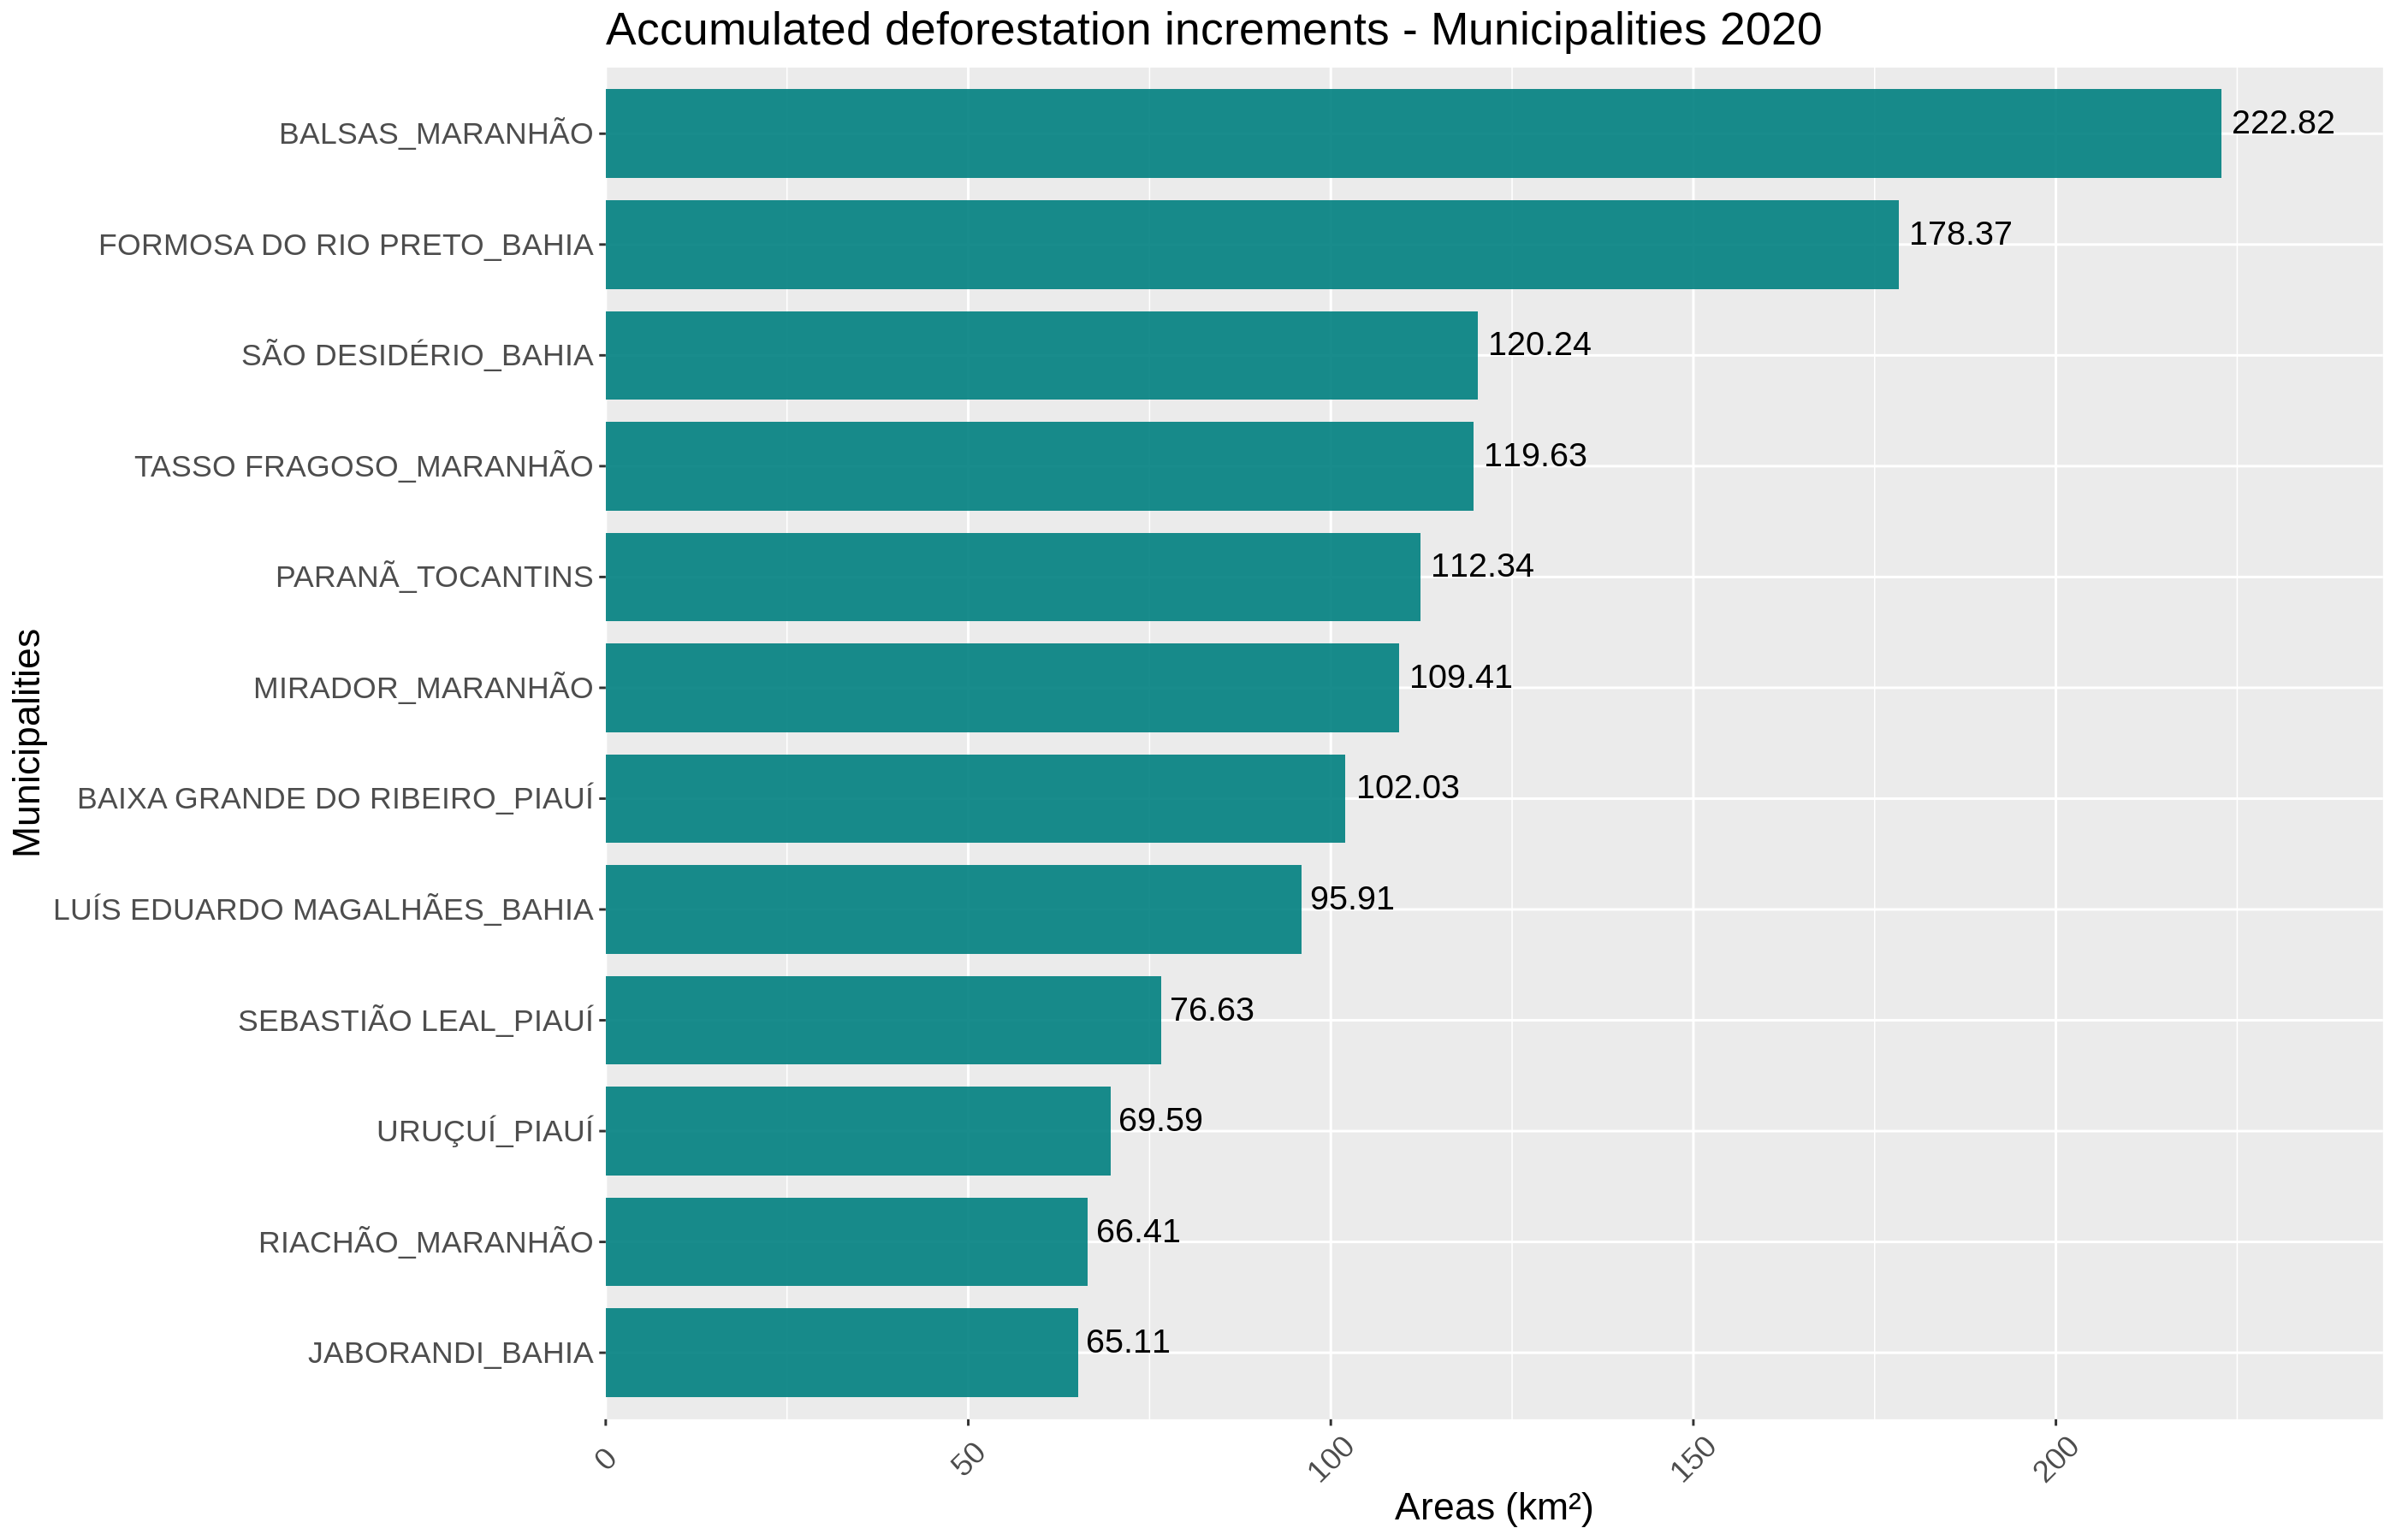

In [15]:
year <- 2020

aggregatedByMunic <- allMNames %>% 
  dplyr::group_by(names, endDate.year) %>% 
  dplyr::summarise(aggregate = sum(area), .groups = 'drop') %>% 
  dplyr::filter(endDate.year==year) %>% 
  dplyr::top_n(12, aggregate) %>% 
  dplyr::arrange(desc(aggregate))
  
# plot data by municipalities - 2020
ggplot(aggregatedByMunic, aes(x=factor(reorder(names, aggregate)), y=aggregate)) +
  geom_bar(stat='identity', width = 0.8, fill = "#008080", alpha = 0.9) +
  geom_text(aes(label=round(aggregate, 2)), vjust=0, hjust=-0.1, size = 5) +
  coord_flip() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=16)) +
  labs(x = "Municipalities") + labs(y = "Areas (km\u00B2)") +
  scale_y_continuous(expand=expansion(mult=c(0,0.10))) +
  labs(title = paste0("Accumulated deforestation increments - Municipalities ", year, sep = ""))

Incrementos de desmatamento acumulado por municpios - agregado de todos os anos

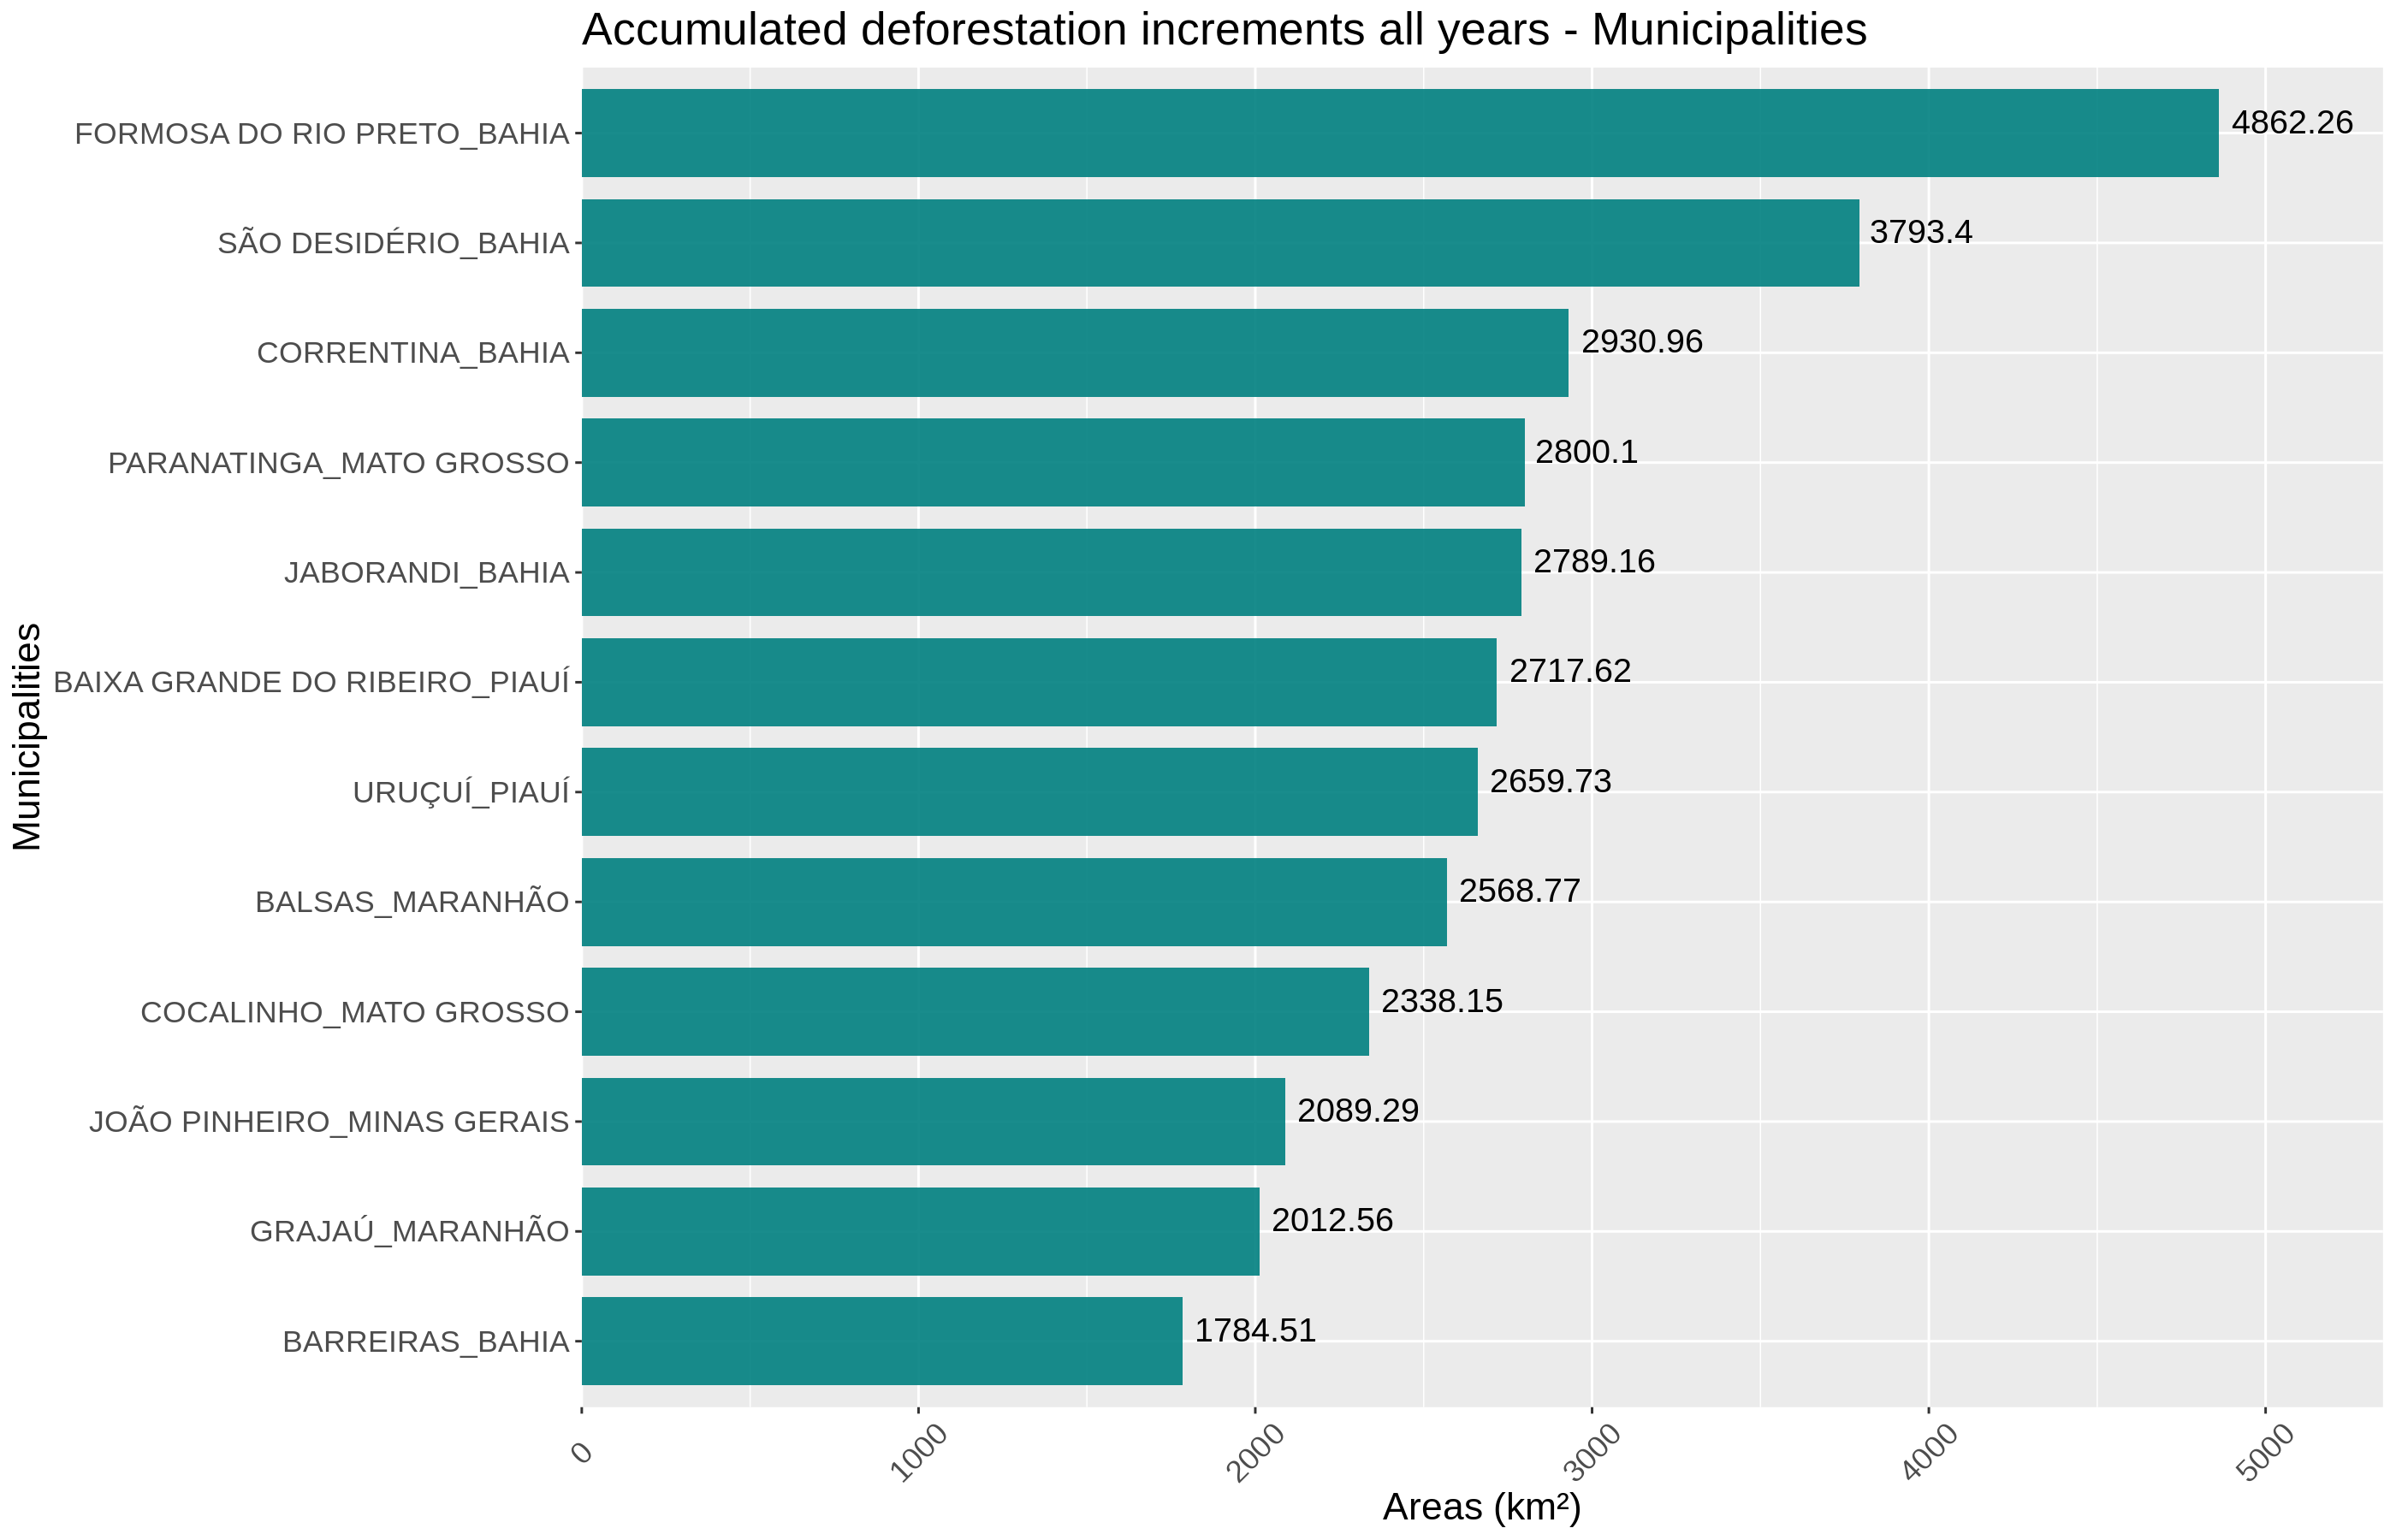

In [16]:
aggregatedByMunicTop13 <- allMNames %>% 
  dplyr::group_by(names) %>% 
  dplyr::summarise(aggregate = sum(area)) %>% 
  dplyr::top_n(12, aggregate) %>% 
  dplyr::arrange(desc(aggregate))

# plot data by municipalities - 2020
ggplot(aggregatedByMunicTop13, aes(x=factor(reorder(names, aggregate)), y=aggregate)) +
  geom_bar(stat='identity', width = 0.8, fill = "#008080", alpha = 0.9) +
  geom_text(aes(label=round(aggregate, 2)), vjust=0, hjust=-0.1, size = 5) +
  coord_flip() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=16)) +
  labs(x = "Municipalities") + labs(y = "Areas (km\u00B2)") +
  scale_y_continuous(expand=expansion(mult=c(0,0.10))) +
  labs(title = "Accumulated deforestation increments all years - Municipalities")

Incrementos de desmatamento acumulado por municípios - estado específico

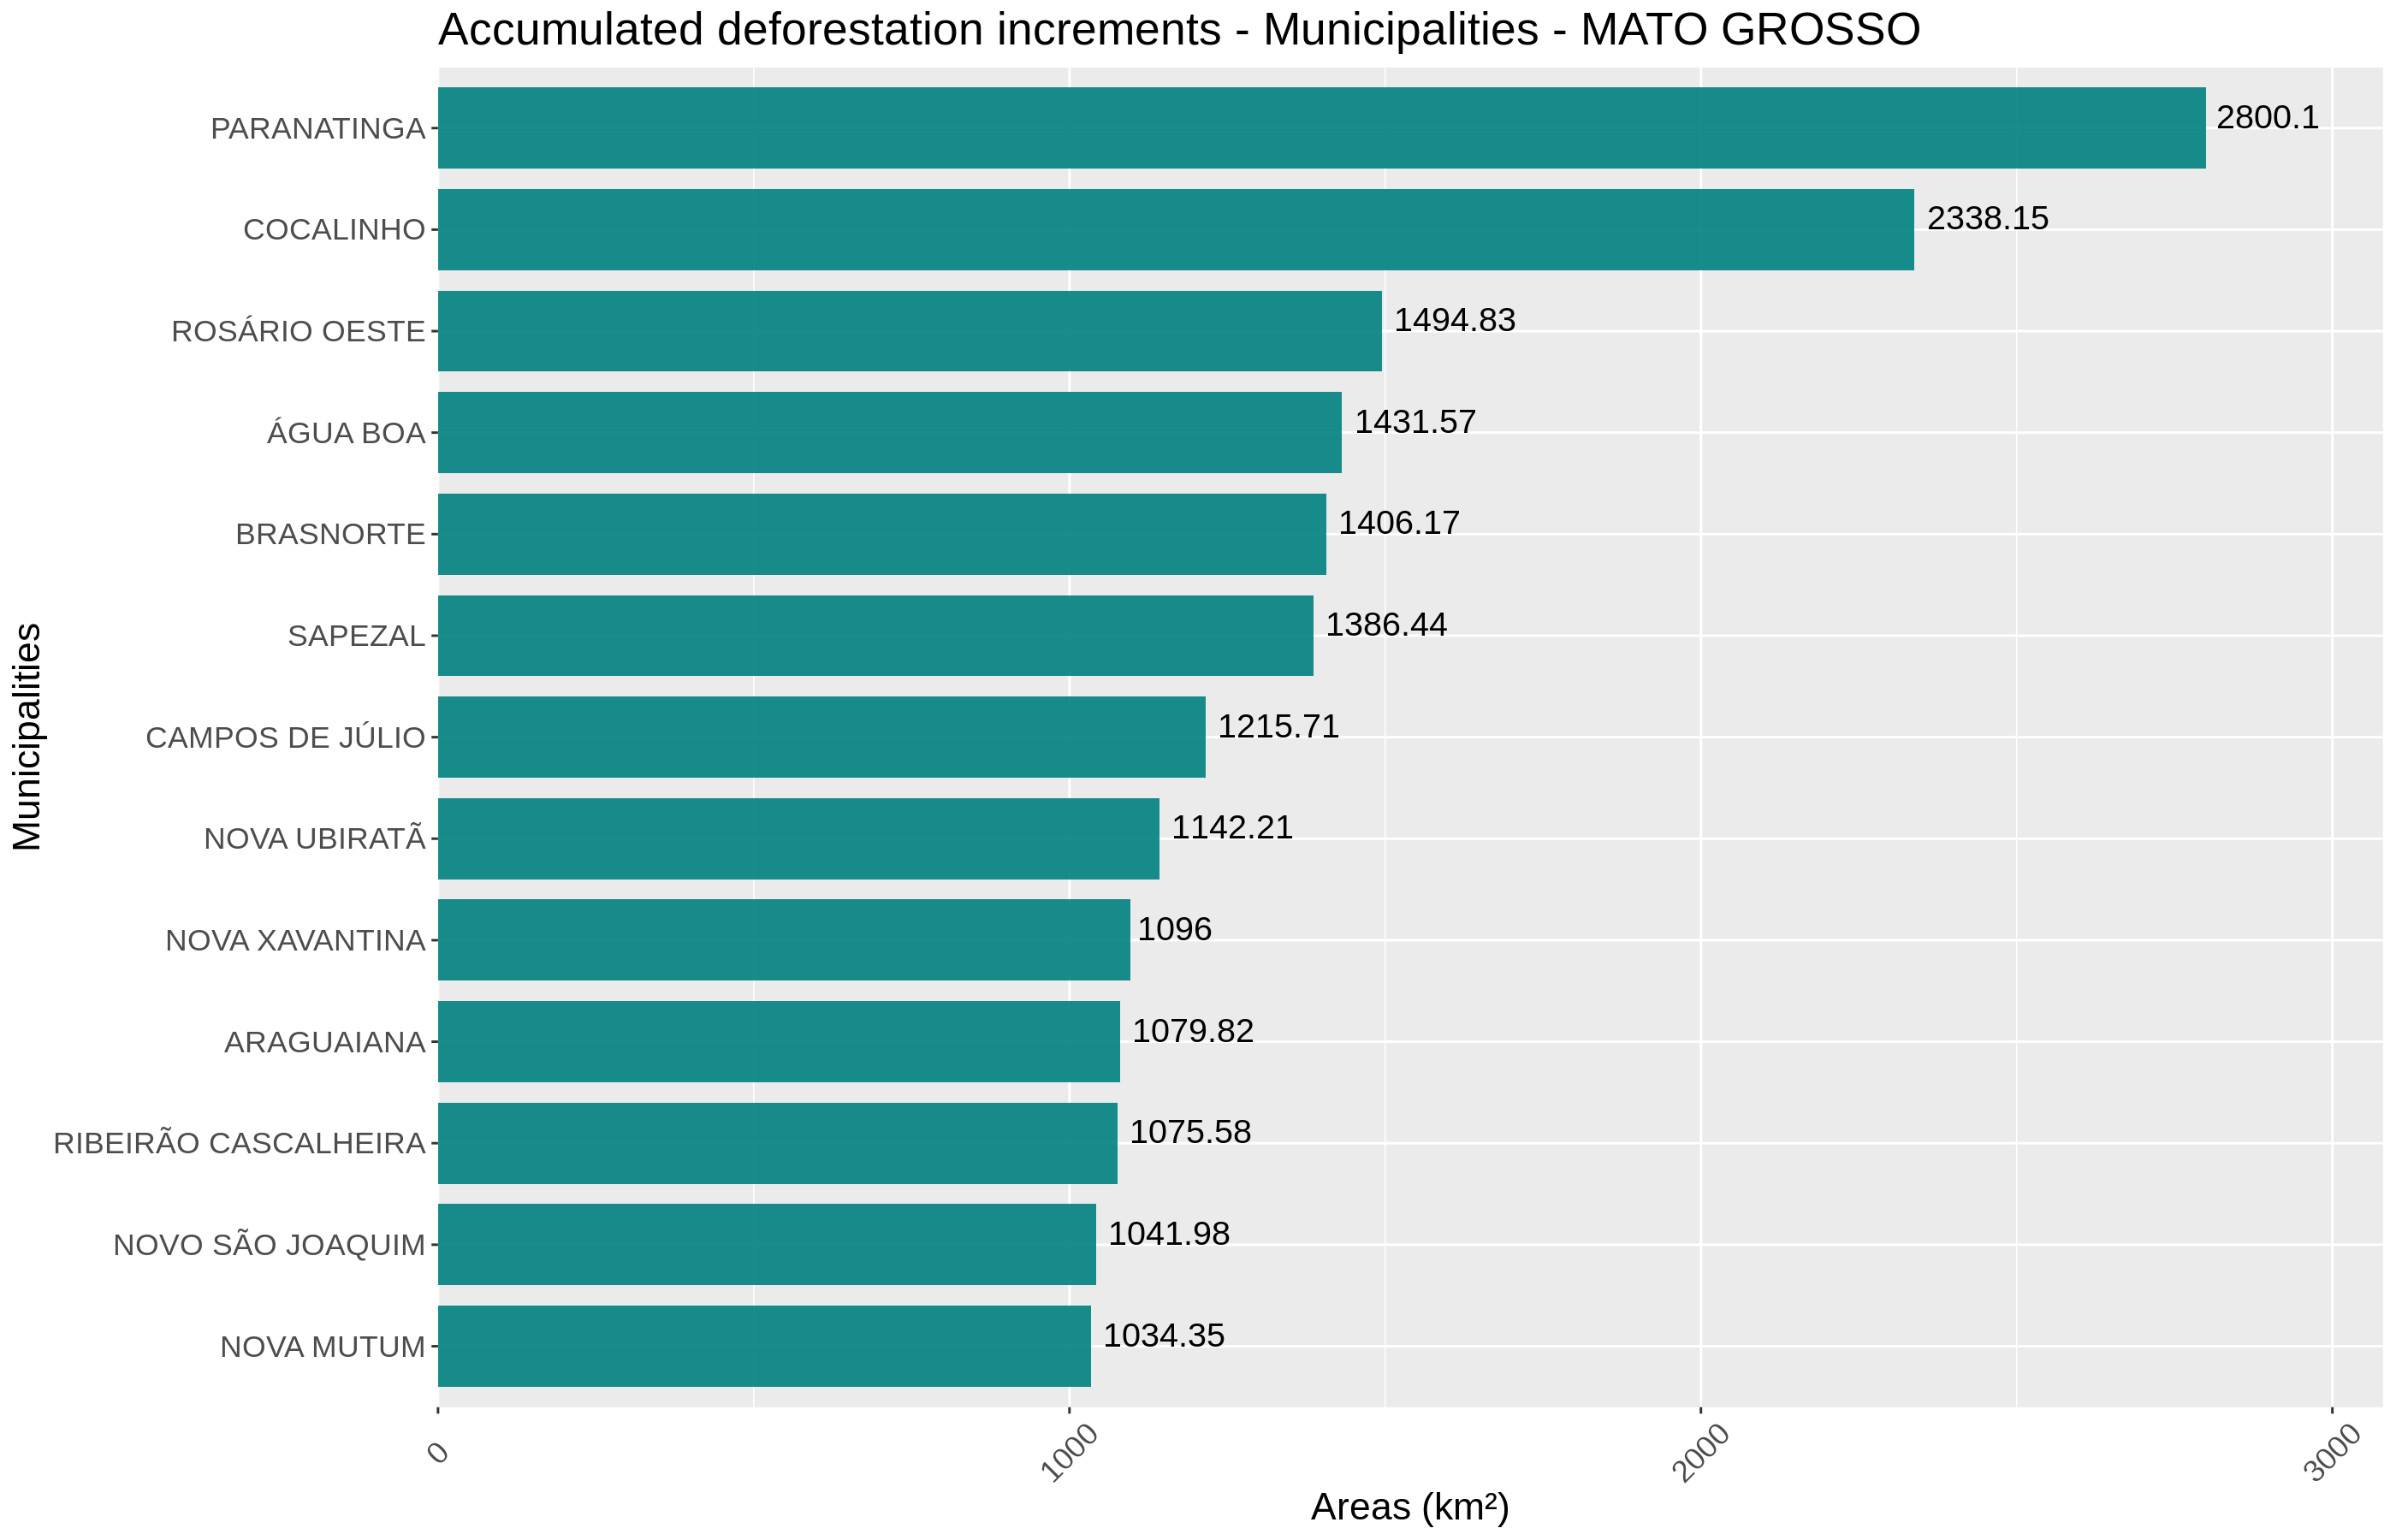

In [17]:
state_n <- "MATO GROSSO" # SÃO PAULO

aggregatedByMunicTop13byState <- allMNames %>% 
  tidyr::separate(names, into = c("muni","state"), sep = "_") %>% 
  dplyr::filter(state==state_n) %>% 
  dplyr::group_by(muni) %>% 
  dplyr::summarise(aggregate = sum(area)) %>% 
  dplyr::top_n(13, aggregate) %>% 
  dplyr::arrange(desc(aggregate))

# plot data by municipalities - 2020
ggplot(aggregatedByMunicTop13byState, aes(x=factor(reorder(muni, aggregate)), y=aggregate)) +
  geom_bar(stat='identity', width = 0.8, fill = "#008080", alpha = 0.9) +
  geom_text(aes(label=round(aggregate, 2)), vjust=0, hjust=-0.1, size = 5) +
  coord_flip() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=16)) +
  labs(x = "Municipalities") + labs(y = "Areas (km\u00B2)") +
  scale_y_continuous(expand=expansion(mult=c(0,0.10))) +
  labs(title = paste0("Accumulated deforestation increments - Municipalities - ", state_n, sep=""))

Incrementos de desmatamento acumulado por municípios - estado específico e ano específico

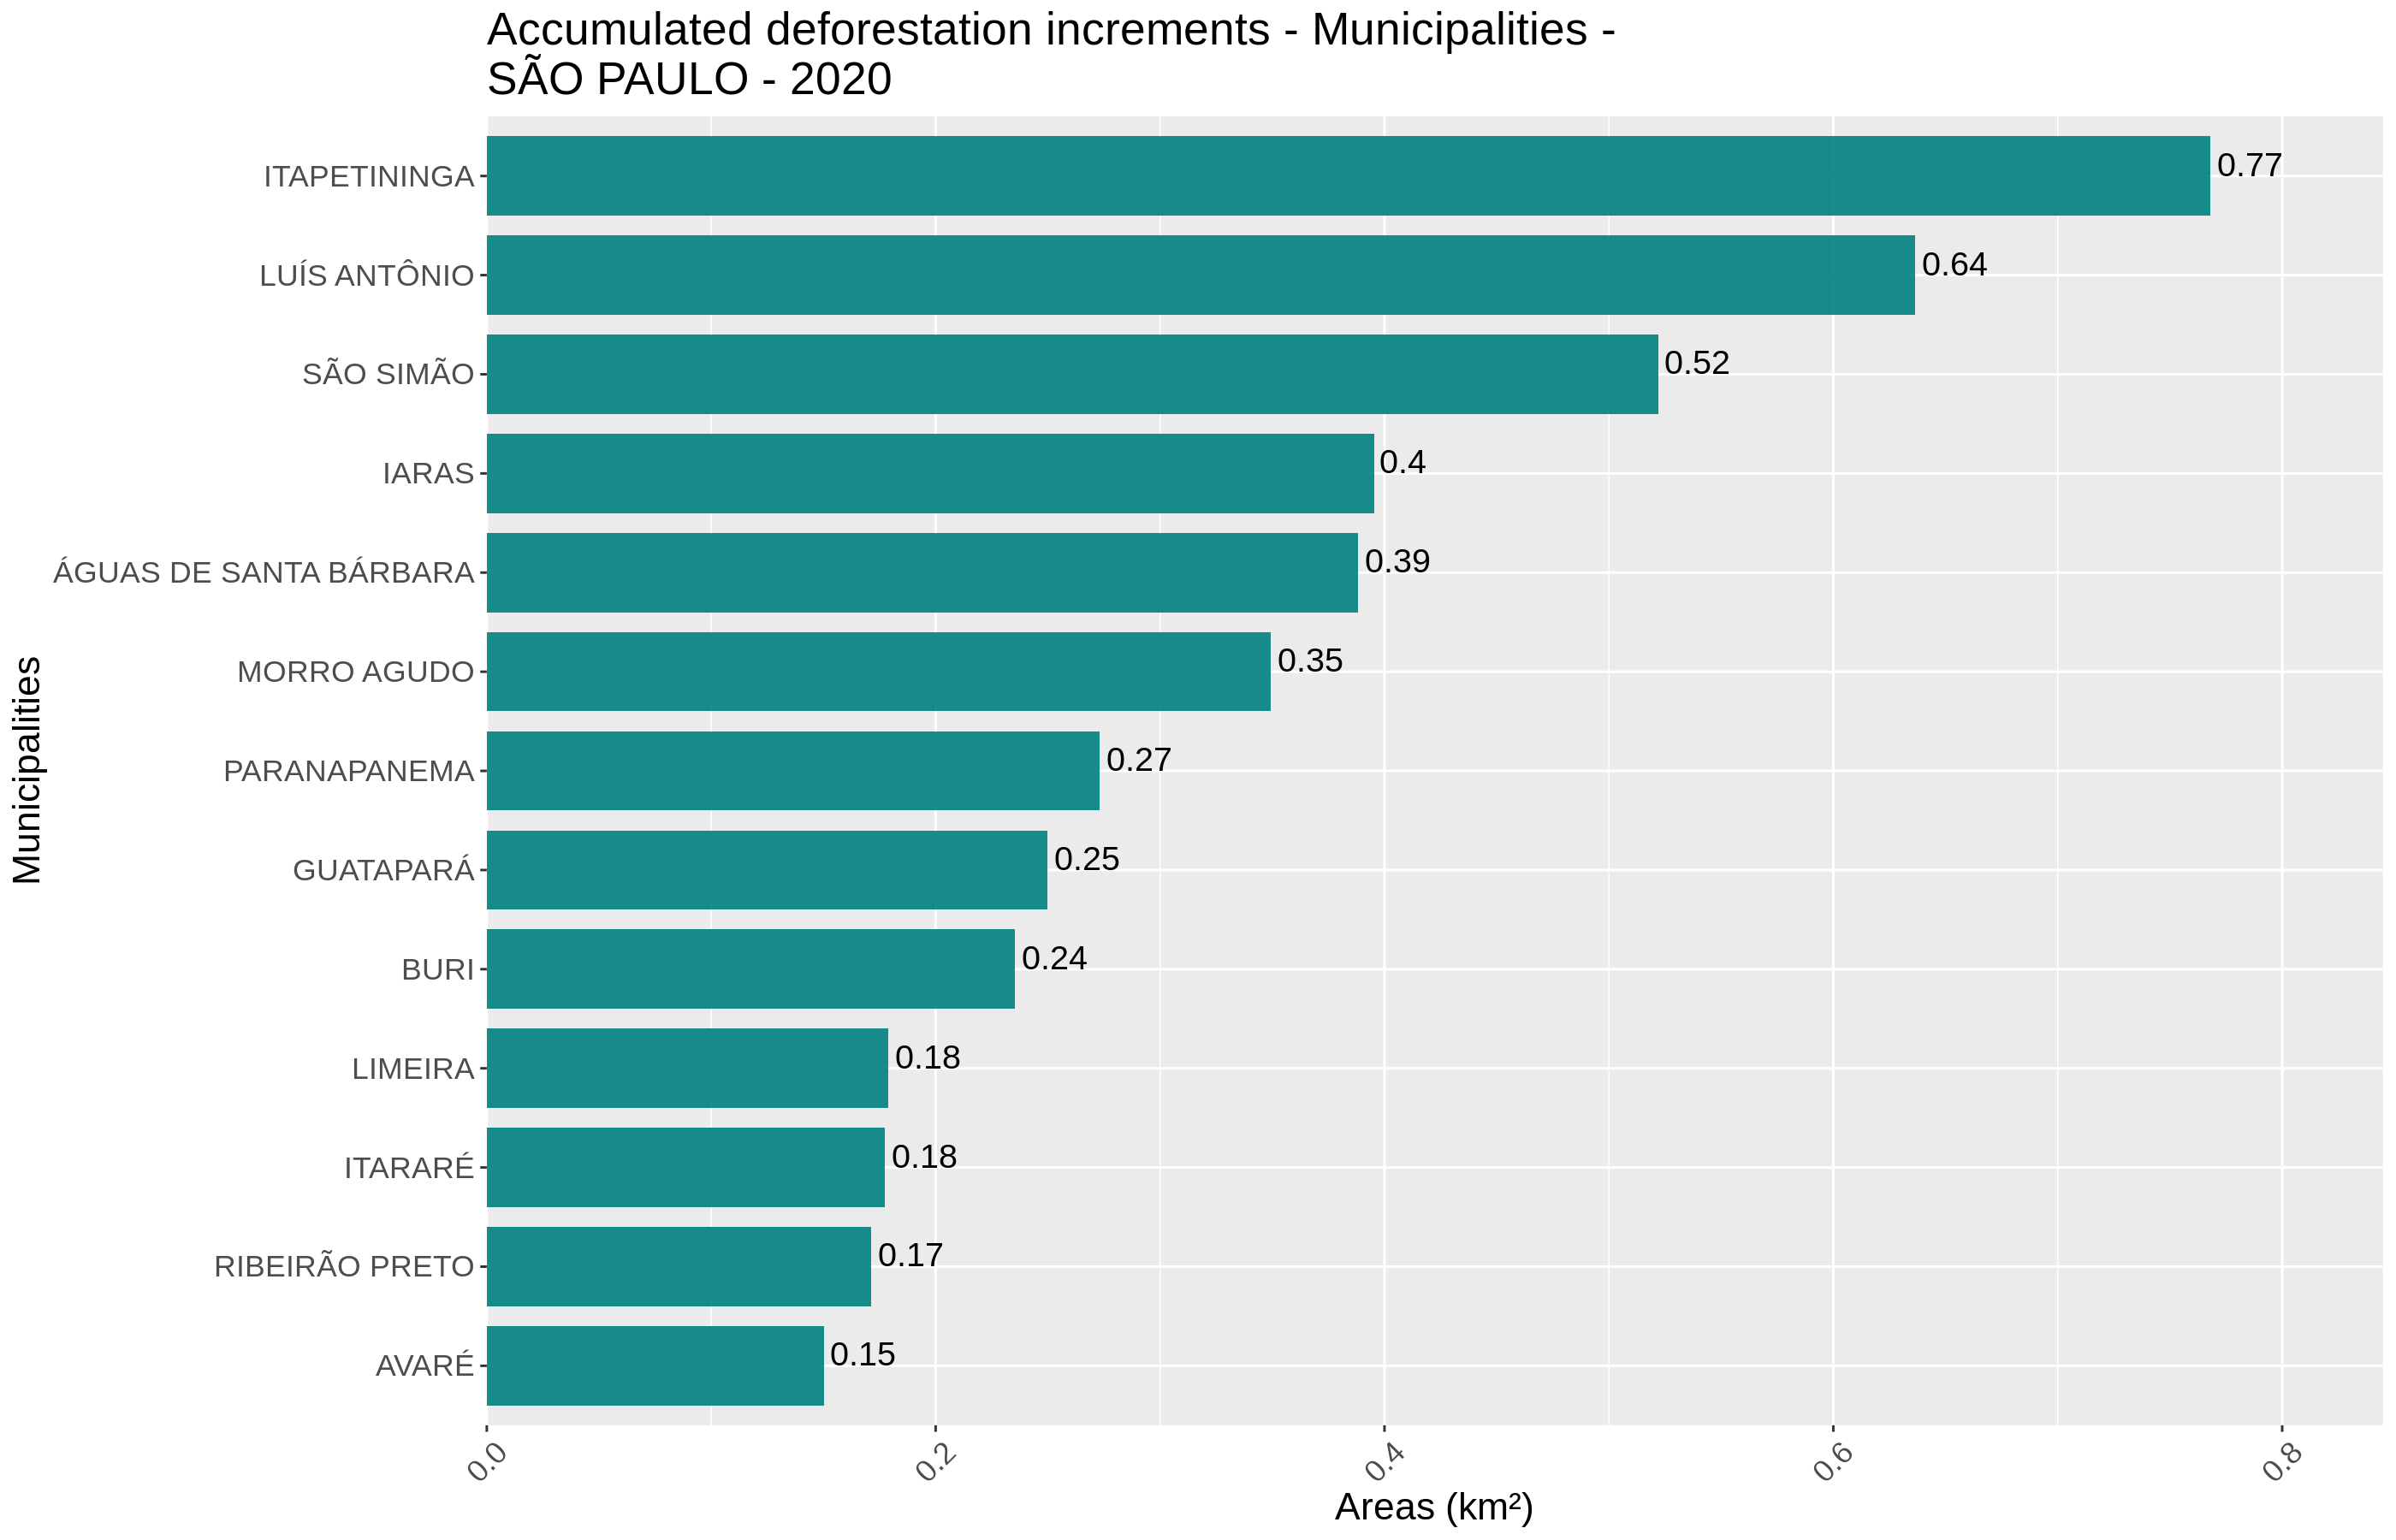

In [18]:
state_n <- "SÃO PAULO" # MATO GROSSO
year <- 2020

aggregatedByMunicTop13byState <- allMNames %>% 
  tidyr::separate(names, into = c("muni","state"), sep = "_") %>% 
  dplyr::filter(state==state_n) %>% 
  dplyr::group_by(muni) %>% 
  dplyr::filter(endDate.year==year) %>% 
  dplyr::summarise(aggregate = sum(area)) %>% 
  dplyr::top_n(13, aggregate) %>% 
  dplyr::arrange(desc(aggregate))

# plot data by municipalities - 2020
ggplot(aggregatedByMunicTop13byState, aes(x=factor(reorder(muni, aggregate)), y=aggregate)) +
  geom_bar(stat='identity', width = 0.8, fill = "#008080", alpha = 0.9) +
  geom_text(aes(label=round(aggregate, 2)), vjust=0, hjust=-0.1, size = 5) +
  coord_flip() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=16)) +
  labs(x = "Municipalities") + labs(y = "Areas (km\u00B2)") +
  scale_y_continuous(expand=expansion(mult=c(0,0.10))) +
  labs(title = paste0("Accumulated deforestation increments - Municipalities -\n", 
                      state_n, " - ", year, sep=""))

Incrementos de desmatamento acumulado por municípios - município específico

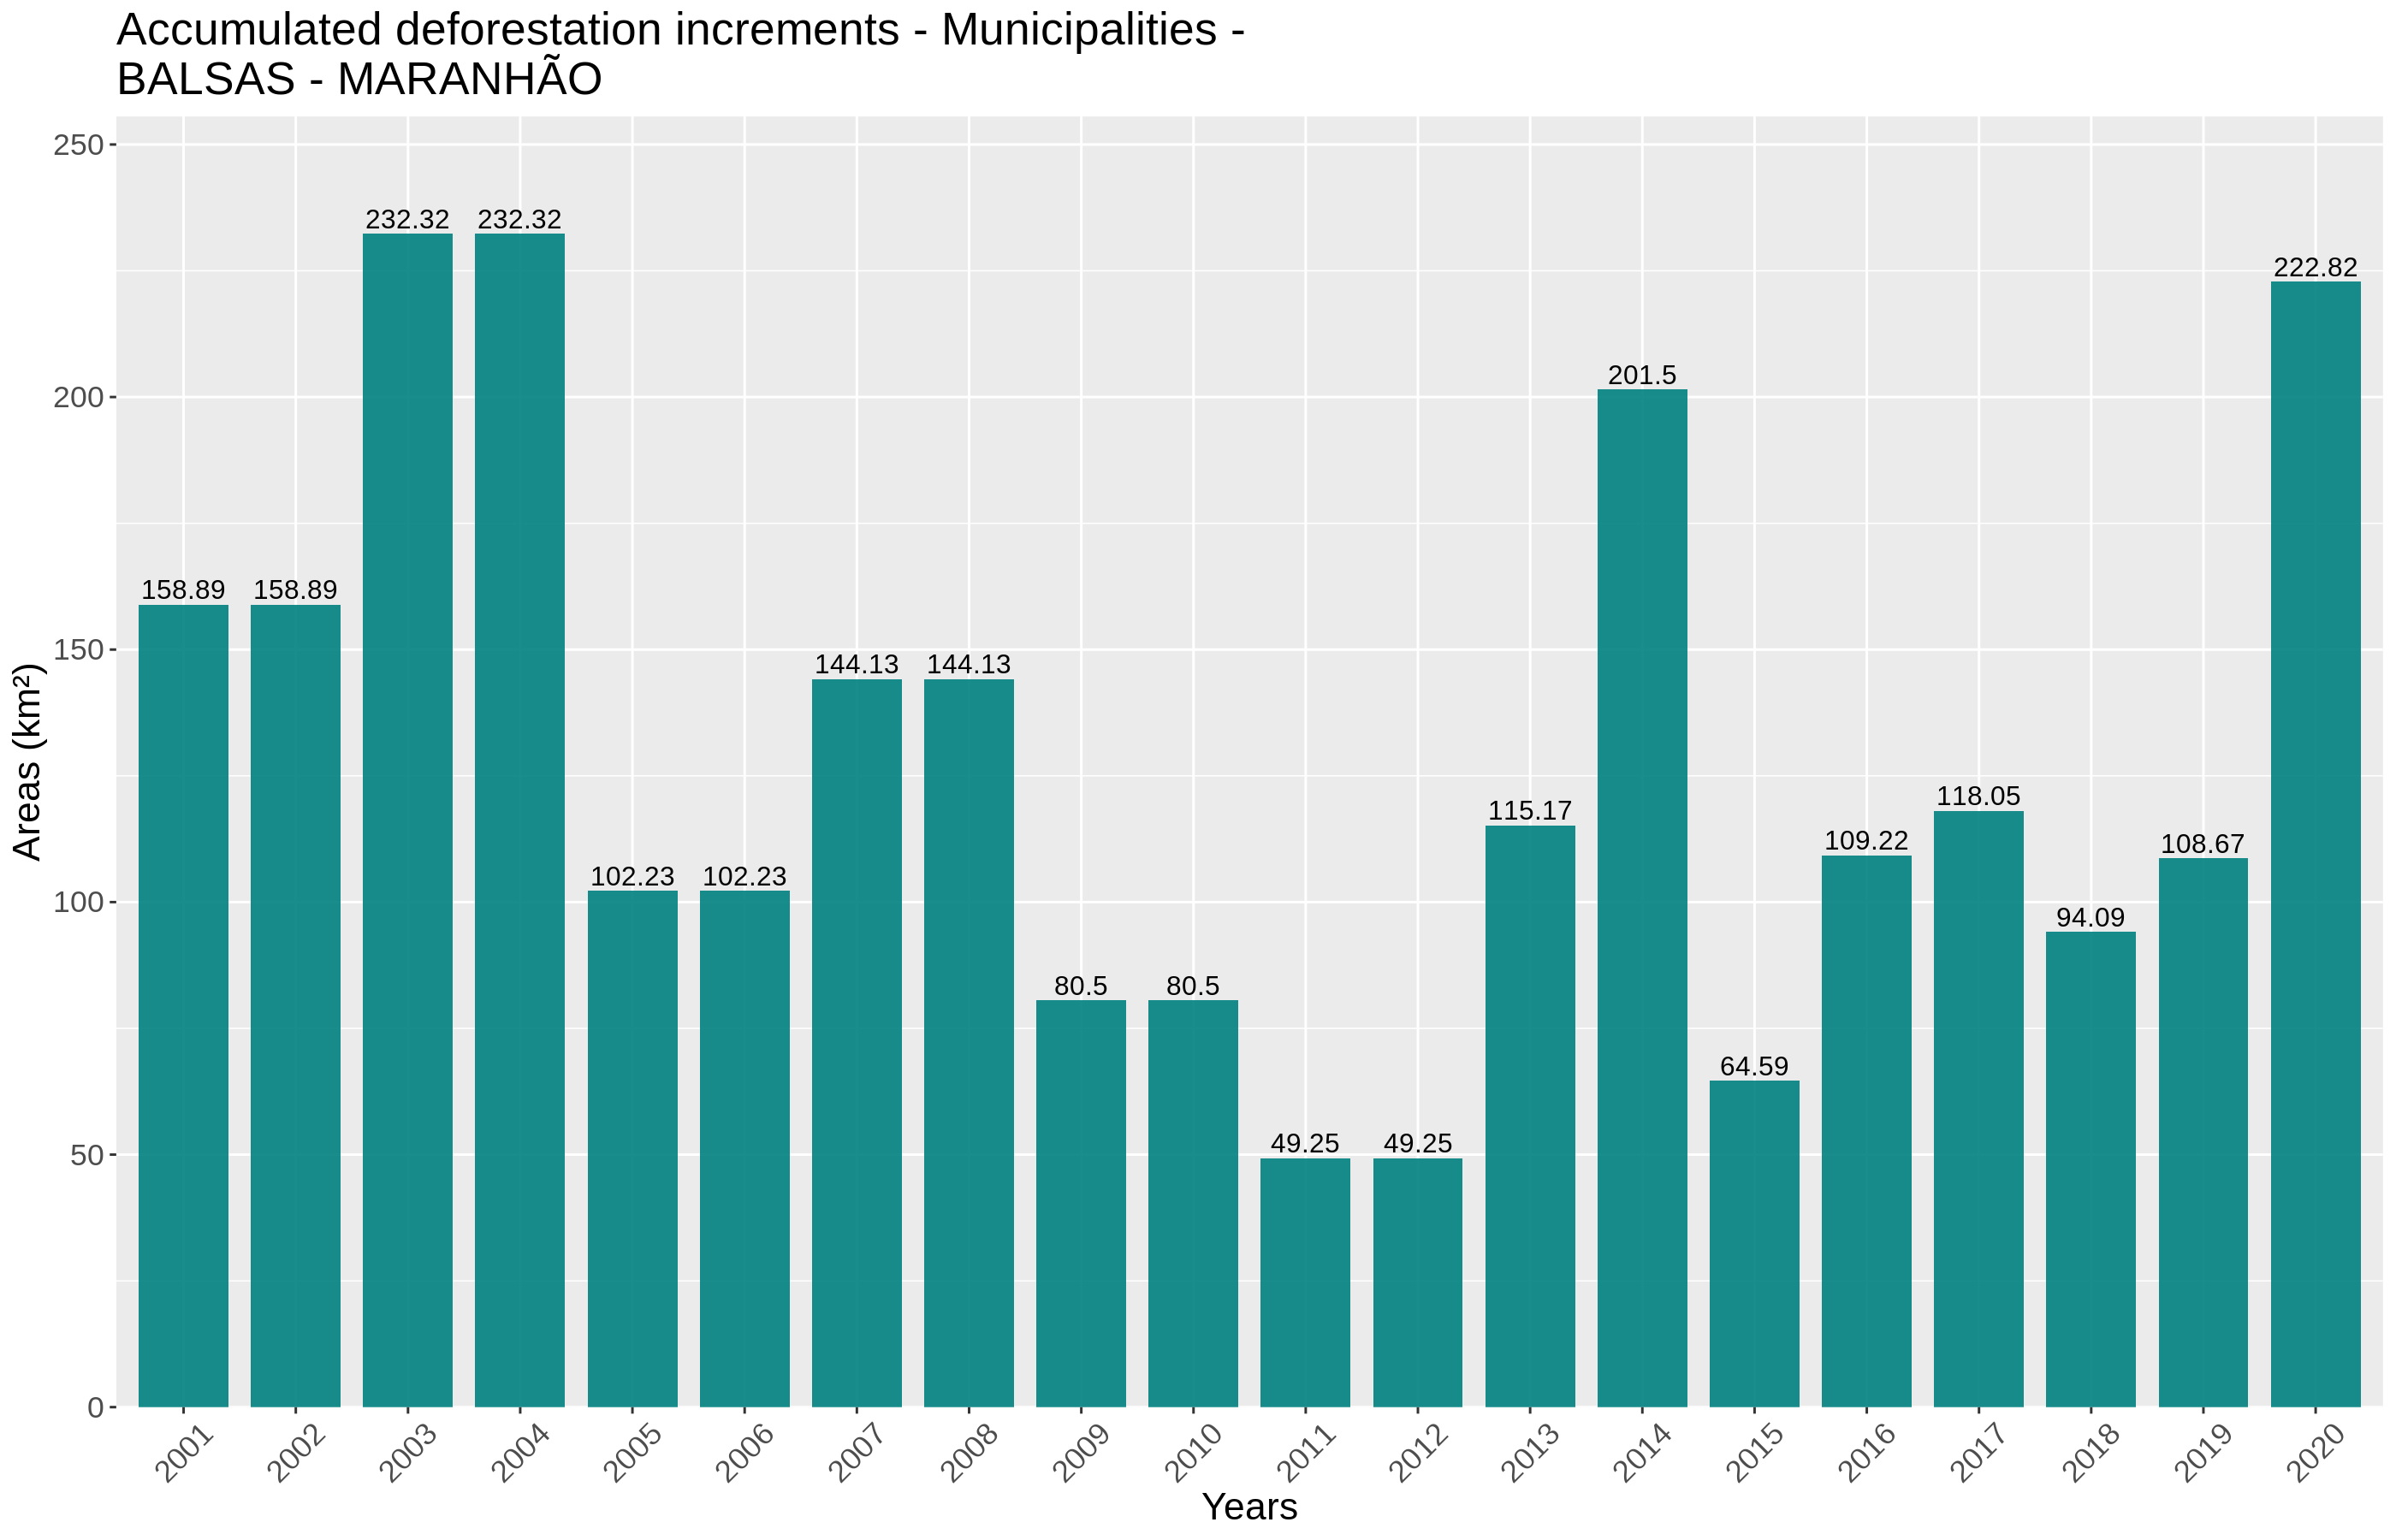

In [19]:
muni_n <- "BALSAS"# SANTA LÚCIA,FORMOSA DO RIO PRETO, 2468 ADELÂNDIA, PONTO CHIQUE, 2850 CRIXÁS

aggregatedByMunicAllYears <- allMNames %>% 
  tidyr::separate(names, into = c("muni","state"), sep = "_") %>% 
  dplyr::filter(muni==muni_n) %>% 
  #dplyr::filter(endDate.year>=2013) %>% 
  dplyr::group_by(muni) 

# plot data by municipalities - 2020
ggplot(aggregatedByMunicAllYears, aes(x=as.factor(endDate.year), end, y=area)) +
  geom_bar(stat='identity', width = 0.8, fill = "#008080", alpha = 0.9) +
  geom_text(aes(label=round(area, 2)), vjust=-0.3, hjust=0.5, size = 4) +
  #coord_flip() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), text = element_text(size=16)) +
  labs(x = "Years") + labs(y = "Areas (km\u00B2)") +
  scale_y_continuous(expand=expansion(mult=c(0,0.10))) +
  labs(title = paste0("Accumulated deforestation increments - Municipalities -\n", muni_n, " - ", 
                      aggregatedByMunicAllYears$state, sep=" "))

## References

Assis, L. F. F. G. A.; Ferreira, K. R.; Vinhas, L.; Maurano, L.; Almeida, C. A., Nascimento, J. R., Carvalho, A. F. A.; Camargo, C.; Maciel, A. M. TerraBrasilis: A Spatial Data Infrastructure for Disseminating Deforestation Data from Brazil. In Proceeding of the XIX Remote Sensing Brazilian Symposium, 2019.

## Reporting Bugs

Any problem should be reported to terrabrasilis@inpe.br.